# Perplexity Score Visualization

This notebook reads the perplexity scores generated by the `perplexity` metric and visualizes their distribution. The scores were calculated on the 'question' column of the SQuAD dataset.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Set plot style
plt.style.use('ggplot')

In [ ]:
# Load the data
file_path = '/content/drive/MyDrive/Colab Notebooks/01. AI & CyberSecurity/perplexity_data.csv'
try:
    df = pd.read_csv(file_path)
    print('CSV file loaded successfully.')
except FileNotFoundError:
    print(f'Error: The file {file_path} was not found.')

CSV file loaded successfully.


In [ ]:
df.shape

(10570, 4)

### Data Overview

In [ ]:
# Display the first few rows and summary statistics
if 'df' in locals():
    print('First 5 rows of the data:')
    display(df.head())
    print('Summary statistics:')
    display(df['score'].describe())

First 5 rows of the data:


,name,score,time,feature_pid
0,perplexity,41.805641,2025-11-19T21:46:23.357621,NaN
1,perplexity,83.289009,2025-11-19T21:46:23.574016,NaN
2,perplexity,29.418066,2025-11-19T21:46:23.820824,NaN
3,perplexity,34.220203,2025-11-19T21:46:24.150382,NaN
4,perplexity,22.152311,2025-11-19T21:46:24.572197,NaN


Summary statistics:


,score
count,10570.000000
mean,44.341913
std,20.034821
min,9.208611
25%,30.318502
50%,40.532383
75%,53.923710
max,173.990524


### Perplexity Score Distribution

The histogram below shows the distribution of the perplexity scores for the questions from the SQuAD dataset. A lower perplexity score generally indicates that the reference model (distilgpt2) found the text more predictable or 'natural'.

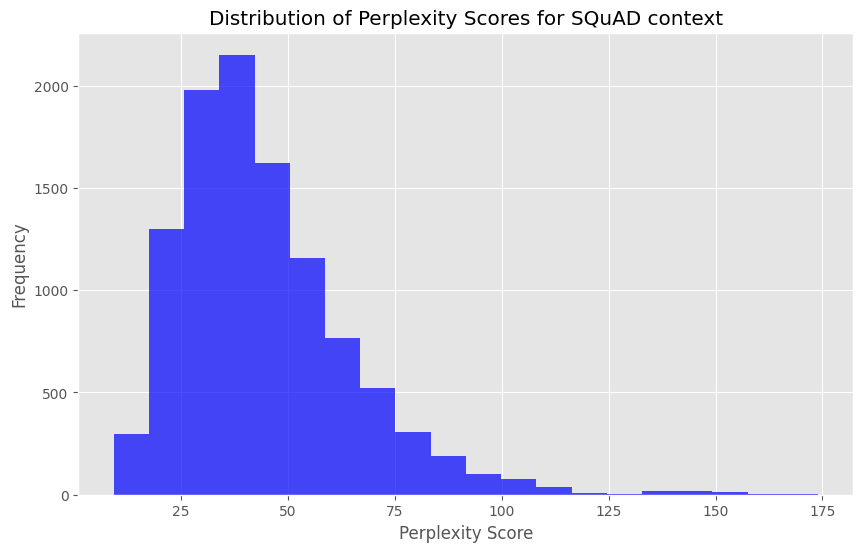

In [ ]:
if 'df' in locals():
    plt.figure(figsize=(10, 6))
    plt.hist(df['score'], bins=20, color='blue', alpha=0.7)
    plt.title('Distribution of Perplexity Scores for SQuAD context')
    plt.xlabel('Perplexity Score')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [ ]:
# Load the data
file_path = '/content/drive/MyDrive/Colab Notebooks/01. AI & CyberSecurity/perplexity_attacked.csv'
try:
    df_attacked = pd.read_csv(file_path)
    print('CSV file loaded successfully.')
except FileNotFoundError:
    print(f'Error: The file {file_path} was not found.')

CSV file loaded successfully.


In [ ]:
# Display the first few rows and summary statistics
if 'df_attacked' in locals():
    print('First 5 rows of the data:')
    display(df_attacked.head())
    print('Summary statistics:')
    display(df['score'].describe())

First 5 rows of the data:


,name,score,time,feature_pid
0,perplexity,51.399006,2025-11-20T18:59:29.748814,NaN
1,perplexity,89.739799,2025-11-20T18:59:29.956360,NaN
2,perplexity,30.791031,2025-11-20T18:59:30.142624,NaN
3,perplexity,35.456417,2025-11-20T18:59:30.385976,NaN
4,perplexity,22.477333,2025-11-20T18:59:30.679799,NaN


Summary statistics:


,score
count,10570.000000
mean,44.341913
std,20.034821
min,9.208611
25%,30.318502
50%,40.532383
75%,53.923710
max,173.990524


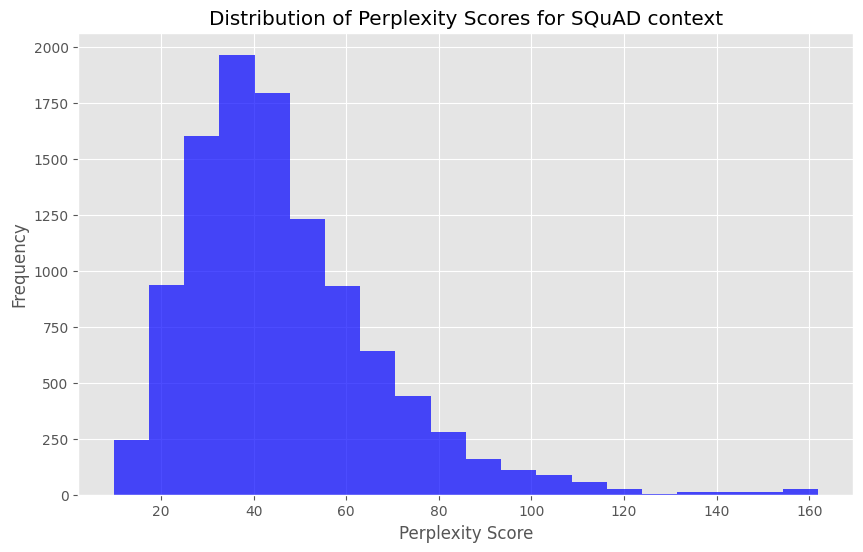

In [ ]:
if 'df_attacked' in locals():
    plt.figure(figsize=(10, 6))
    plt.hist(df_attacked['score'], bins=20, color='blue', alpha=0.7)
    plt.title('Distribution of Perplexity Scores for SQuAD context')
    plt.xlabel('Perplexity Score')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

--- Summary Statistics ---
           Original      Attacked
count  10570.000000  10570.000000
mean      44.341913     46.351992
std       20.034821     20.838364
min        9.208611      9.759537
25%       30.318502     31.909386
50%       40.532383     42.302746
75%       53.923710     56.515095
max      173.990524    161.929581

Average Perplexity Increase: 2.0101


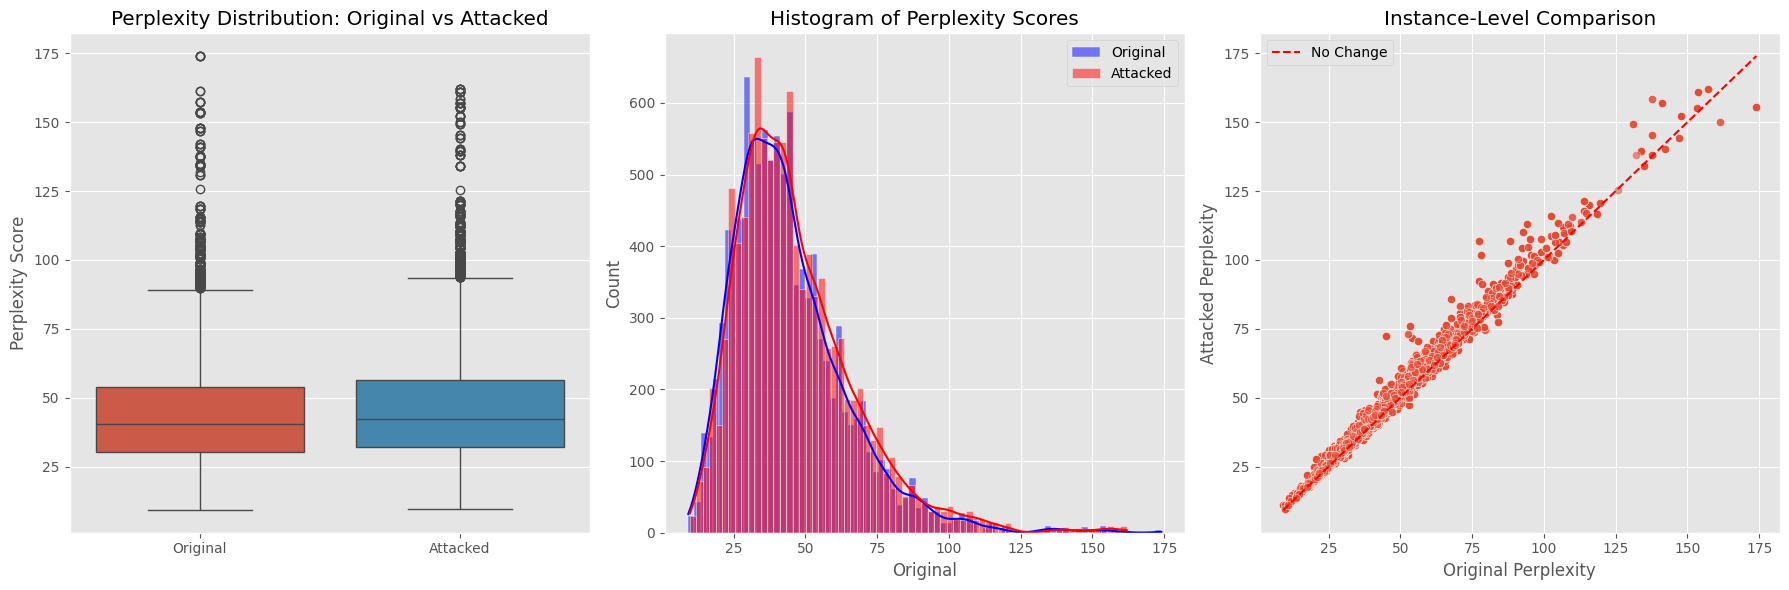

In [ ]:
import seaborn as sns


score_col = 'score'

comparison_df = pd.DataFrame({
    'Original': df[score_col].values,
    'Attacked': df_attacked[score_col].values
})

# Calculate the increase in perplexity (Attacked - Original)
comparison_df['Difference'] = comparison_df['Attacked'] - comparison_df['Original']

print("--- Summary Statistics ---")
print(comparison_df[['Original', 'Attacked']].describe())
print(f"\nAverage Perplexity Increase: {comparison_df['Difference'].mean():.4f}")

plt.figure(figsize=(18, 6))

# Plot A: Side-by-Side Boxplot
plt.subplot(1, 3, 1)
sns.boxplot(data=comparison_df[['Original', 'Attacked']])
plt.title('Perplexity Distribution: Original vs Attacked')
plt.ylabel('Perplexity Score')

# Plot B: Overlapping Histogram
plt.subplot(1, 3, 2)
sns.histplot(comparison_df['Original'], color='blue', label='Original', kde=True, alpha=0.5)
sns.histplot(comparison_df['Attacked'], color='red', label='Attacked', kde=True, alpha=0.5)
plt.title('Histogram of Perplexity Scores')
plt.legend()

# Plot C: Scatter Plot
# Points above the diagonal line indicate the attack increased perplexity
plt.subplot(1, 3, 3)
sns.scatterplot(x='Original', y='Attacked', data=comparison_df, alpha=0.6)
# Add a diagonal line for reference (where x=y)
limit_min = min(comparison_df[['Original', 'Attacked']].min())
limit_max = max(comparison_df[['Original', 'Attacked']].max())
plt.plot([limit_min, limit_max], [limit_min, limit_max], 'r--', label='No Change')
plt.title('Instance-Level Comparison')
plt.xlabel('Original Perplexity')
plt.ylabel('Attacked Perplexity')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Calculate how many times the attack actually increased perplexity
success_count = (comparison_df['Attacked'] > comparison_df['Original']).sum()
success_rate = (success_count / len(comparison_df)) * 100

print(f"Attack Success Rate: {success_rate}%")

Attack Success Rate: 88.07000946073794%
